# **Building, evaluating, and selecting a predictive model for our bank**
The bank now aims to market the PEP to only a subset of the customers who are more likely to be interested
and sign up for the PEP investment plan. With this in mind, the bank considers the following predictive modeling
approaches: classification tree, logistic regression, and bagging.

## Import Dependenices

In [23]:
!pip install liac-arff


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests
import arff

from sklearn.model_selection import cross_val_score, cross_val_predict

In [25]:
# get data from online
training_arff = requests.get('https://raw.githubusercontent.com/juwon0502/MIS-373-Predictive-Analytics/master/datasets/bank-training.arff')
testing_arff = requests.get('https://raw.githubusercontent.com/juwon0502/MIS-373-Predictive-Analytics/master/datasets/bank-NewCustomers.arff')

# read as arff file
training_arff = arff.load(training_arff.text)
testing_arff = arff.load(testing_arff.text)
col_val = [attribute[0] for attribute in training_arff['attributes']]

# transform arff file into pandas dataframe
training_df = pd.DataFrame(training_arff['data'], columns = col_val)
testing_df = pd.DataFrame(testing_arff['data'], columns = col_val)
meta = training_arff['attributes']

# convert data type
def clean_df(df):
  cols = list(df.columns)
  for col in cols:
    try:
      df = df.replace({col: {'YES': True, 'NO': False}})
    except:
      pass
    pass
  return df

# further clean the data
training_df = clean_df(training_df)
training_df = pd.get_dummies(training_df)
testing_df = pd.get_dummies(clean_df(testing_df))

training_df = training_df.drop(columns = ['sex_MALE'])
testing_df = testing_df.drop(columns = ['sex_MALE'])

In [26]:
X = training_df.drop(columns = ['pep'])
y = training_df.pep

Create three models: [decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), and [bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

# Here we have random_state set to 0 so that we can reproduce the results
logistic_regression_model =LogisticRegression(random_state=0).fit(X,y)
decision_tree_model =DecisionTreeClassifier(criterion = "entropy", max_depth = 6,random_state=0).fit(X,y)
bagging_model = BaggingClassifier(base_estimator=decision_tree_model, n_estimators=20, random_state=0).fit(X,y)

c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Using 10 fold [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score) to see the accuracy score and ROC AUC score for each model

In [28]:
logistic_regression_scores = cross_val_score(logistic_regression_model, X, y, cv=10, scoring='roc_auc').mean()
decision_tree_scores = cross_val_score(decision_tree_model, X, y, cv=10, scoring='roc_auc').mean()
bagging_scores = cross_val_score(bagging_model, X, y, cv=10, scoring='roc_auc').mean()

print("Logistic Regression Model ROC AUC score: ", logistic_regression_scores)
print("Decision Tree Model ROC AUC score: ", decision_tree_scores)
print("Bagging Model ROC AUC score: ", bagging_scores)

c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWar

Logistic Regression Model ROC AUC score:  0.6200951729597562
Decision Tree Model ROC AUC score:  0.8803193141734809
Bagging Model ROC AUC score:  0.9186534241221741


Create dataframes for each model of the actual classification and it's corresponding prediction probability

In [29]:
prob_df = pd.DataFrame()

prob_df['Actual Class'] = training_df.pep
dt_prob_df = prob_df.iloc[:]
lg_prob_df = prob_df.iloc[:]
bg_prob_df = prob_df.iloc[:]

dt_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(decision_tree_model, X, y, cv=10, method='predict_proba')]
lg_prob_df['prob'] = [round(pred[1],4) for pred in  cross_val_predict(logistic_regression_model, X, y, cv=10, method='predict_proba')]
bg_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(bagging_model, X, y, cv=10, method='predict_proba')]

dt_prob_df = dt_prob_df.sort_values("prob", ascending = False)
lg_prob_df = lg_prob_df.sort_values("prob", ascending = False)
bg_prob_df = bg_prob_df.sort_values("prob", ascending = False)

c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\Jack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWar

In [30]:
# we store the values of the true count for each model in a list for easier plotting later

# code to get scatter points for decision tree model
dt_true_count = 0
dt_y_val = []
for row in dt_prob_df.iterrows():
  if(row[1][0]):
    dt_true_count += 1
  dt_y_val.append(dt_true_count)

# code to get scatter points for logistic regression model and bagging model
lg_true_count = 0
lg_y_val = []
for row in lg_prob_df.iterrows():
  if(row[1][0]):
    lg_true_count += 1
  lg_y_val.append(lg_true_count)

bg_true_count = 0
bg_y_val = []
for row in bg_prob_df.iterrows():
  if(row[1][0]):
    bg_true_count += 1
  bg_y_val.append(bg_true_count)

## Plot Lift Chart

Plot all models onto one lift chart with a random line.

In [31]:
# find the number of positive cases
num_Yes = sum(training_df.pep)
# 45.67% of the customers are positive cases
prop_pos = num_Yes/len(training_df)

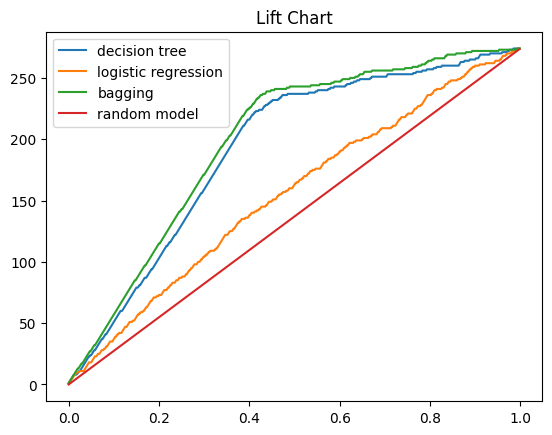

In [32]:
x_vals = [n/600 for n in range(0,600)]
random_vals = [n*prop_pos for n in range(0,600)]
# plot the lift chart with the three models
plt.plot(x_vals, dt_y_val, label = "decision tree")
plt.plot(x_vals, lg_y_val, label = "logistic regression")
plt.plot(x_vals, bg_y_val, label = "bagging")
# include random line
plt.plot(x_vals, random_vals, label = "random model")
plt.title("Lift Chart")
plt.legend()
plt.show()

From the lift chart we can see, the bagging model is the best model. The bagging model has the highest lift curve, which means it has the highest accuracy. The decision tree model has the second highest lift curve, and the logistic regression model has the lowest lift curve with the lowest accuracy out of the three models. All models are better than random model, with higher lift curves and accuracies.

## Profit chart:

We need to design a marketing campaign such that the campaign profitability would be maximized.

-We are given that the bank’s benefits when a customer who was targeted in the campaign also signs up for the PEP is $100.

-if a customer who had been targeted does not choose to have a PEP the bank loss is $70.

Using profit charts, we can see which model yields a higher maximum profitability.

In [33]:
# use dictionaries to store profits
profit_dt = {}
profit_lg = {}
profit_bg = {}

In [34]:
# store the profit for each model as we increase the number of customers we contact
size = 0
profit = 0
for row in dt_prob_df.iterrows():
  size += 1
  if(row[1][0]):
    profit += 100
    profit_dt[size] = profit
  else:
    profit -= 70
    profit_dt[size] = profit

size = 0
profit = 0
for row in lg_prob_df.iterrows():
    size += 1
    if(row[1][0]):
        profit += 100
        profit_lg[size] = profit
    else:
        profit -= 70
        profit_lg[size] = profit

size = 0
profit = 0
for row in bg_prob_df.iterrows():
    size += 1
    if(row[1][0]):
        profit += 100
        profit_bg[size] = profit
    else:
        profit -= 70
        profit_bg[size] = profit

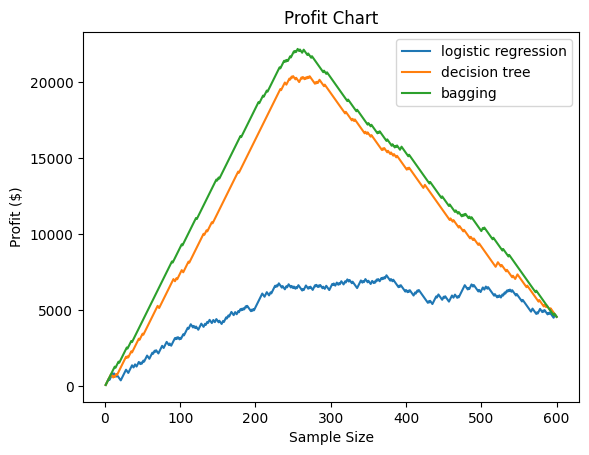

In [35]:
# Decision tree model profit chart
plt.plot(list(profit_lg.keys()), list(profit_lg.values()), label = "logistic regression")
# Logistic regression model profit chart
plt.plot(list(profit_dt.keys()), list(profit_dt.values()), label = "decision tree")
# Bagging model profit chart
plt.plot(list(profit_bg.keys()), list(profit_bg.values()), label = "bagging")
plt.xlabel("Sample Size")
plt.ylabel("Profit ($)")
plt.legend()
plt.title("Profit Chart")

plt.show()

From the graph we can see, the bagging model yields the highest maximum profit. 

## Get optimal threshold

Based on the model that yields highest maximum profit, what is the probability threshold (probability of "Yes") above which customers should be targeted to achieve the maximum profit in the campaign?

In [36]:
#Sort the bagging dictionary by value
profit_bg_sorted = sorted(profit_bg.items(), key=lambda x: x[1], reverse=True)
#Get the number of targets that maximizes profit
highest_cust = profit_bg_sorted[0][0]
#The probability threshold
prob_thresh = bg_prob_df.iloc[highest_cust-1][1]

print('If we use the bagging model, we can maximize profit by targeting the top', highest_cust, 'customers.')
print('The probability threshold is', prob_thresh)

If we use the bagging model, we can maximize profit by targeting the top 256 customers.
The probability threshold is 0.5678


In [37]:
#Bagging model is the best model, but we will also test out the other two models below:

profit_lg_sorted = sorted(profit_lg.items(), key=lambda x: x[1], reverse=True)
profit_dt_sorted = sorted(profit_dt.items(), key=lambda x: x[1], reverse=True)
#Get the number of targets that maximizes profit
highest_cust_lg = profit_lg_sorted[0][0]
highest_cust_dt = profit_dt_sorted[0][0]
#The probability threshold
prob_thresh_lg = lg_prob_df.iloc[highest_cust_lg-1][1]
prob_thresh_dt = dt_prob_df.iloc[highest_cust_dt-1][1]

print('If we use the logistic regression model, we can maximize profit by targeting the top', highest_cust_lg, 'customers.')
print('The probability threshold is', prob_thresh_lg)
print('If we use the decision tree model, we can maximize profit by targeting the top', highest_cust_dt, 'customers.')
print('The probability threshold is', prob_thresh_dt)

If we use the logistic regression model, we can maximize profit by targeting the top 374 customers.
The probability threshold is 0.4498
If we use the decision tree model, we can maximize profit by targeting the top 250 customers.
The probability threshold is 0.7059


## Lastly, we identify the new customers who should be targeted in the profit-optimizing campaign we designed.

In [38]:
#We prepare the test data which includes the new customers
X_test = testing_df.drop(columns='pep') 
y_test = testing_df.pep

In [39]:
#Since bagging model is the best model, we will use it and its probability threshold (0.5678) to predict the test set
testing_df['proba'] = [round(pred[1],4) for pred in bagging_model.predict_proba(X_test)]

testing_df = testing_df.sort_values('proba', ascending = False)
target_df = testing_df.loc[testing_df['proba'] >= prob_thresh]

pd.options.display.max_rows = 200
target_df

,age,income,married,children,car,save_act,current_act,mortgage,pep,sex_FEMALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,proba
60,64.0,60176.1,True,3.0,False,True,True,False,True,0,0,1,0,0,1.0000
11,26.0,22378.5,False,0.0,True,False,True,True,True,1,1,0,0,0,0.9916
109,20.0,18824.1,False,0.0,False,False,True,True,False,1,1,0,0,0,0.9916
116,47.0,36766.0,False,0.0,False,False,True,False,False,0,1,0,0,0,0.9898
197,54.0,29348.8,False,0.0,False,False,True,True,True,0,0,1,0,0,0.9871
20,40.0,37227.8,False,1.0,True,True,True,False,False,0,0,0,0,1,0.9865
80,44.0,23790.4,False,1.0,False,True,True,False,False,0,0,0,0,1,0.9824
129,46.0,17049.3,False,1.0,False,True,False,False,False,1,1,0,0,0,0.9824
150,41.0,18093.4,True,1.0,False,False,True,True,False,1,0,0,1,0,0.9784
73,42.0,23174.9,True,1.0,True,False,False,True,True,0,0,0,1,0,0.9784


## Evaluation

In [40]:
# How many customers are we targeting?
len(target_df)
print('We are targeting', len(target_df), 'customers.')

We are targeting 79 customers.


In [41]:
# What is the actual number of target customers that maximizes profit for the test data?
profit_bg_testing = {}
size = 0
profit = 0
for row in testing_df.iterrows():
    size += 1
    if(row[1][8]):
        profit += 100
        profit_bg_testing[size] = profit
    else:
        profit -= 70
        profit_bg_testing[size] = profit

#Sort the bagging dictionary by value
profit_bg_testing_sorted = sorted(profit_bg_testing.items(), key=lambda x: x[1], reverse=True)

print ('The actual number of target customers that maximizes profit for the test data is', profit_bg_testing_sorted[0][0])

The actual number of target customers that maximizes profit for the test data is 66


We can see our model and threshold is not performing that good on the test data, since the number of target customers that maximizes profit for the test data is 66, while our model predicted 79.

In [42]:
# Find the number of positive cases in the test set
num_Yes = sum(target_df.pep)
# Find the percent of the customers that are positive cases
num_Yes/len(target_df)

0.4430379746835443

We can see our model and threshold is not very accurate on the test set, with only 44.3% of the customers being positive cases.